In [1]:
import numpy as np 
import pandas as pd  

import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv (r"car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df = df.drop('Kms_Driven',axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,Diesel,Dealer,Manual,0


In [9]:
df.Car_Name.value_counts(dropna=False)

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger 150 street     1
Name: count, Length: 97, dtype: int64

In [10]:
df.Car_Name.value_counts(dropna=False)

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger 150 street     1
Name: count, Length: 97, dtype: int64

In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

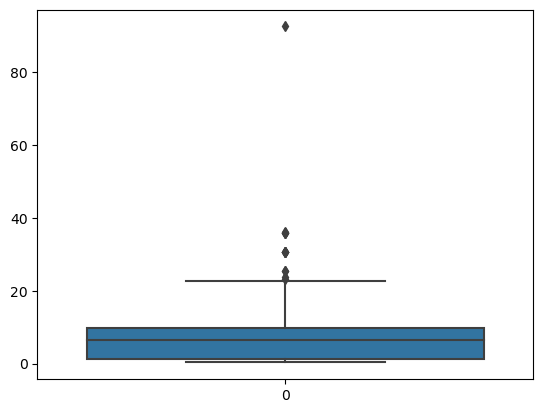

In [14]:
sns.boxplot(data=df.Present_Price )

In [38]:
df.Transmission.value_counts(normalize=True)

Transmission
Manual       0.86711
Automatic    0.13289
Name: proportion, dtype: float64

In [44]:
import plotly.express as px

fig = px.pie(df,names='Transmission',color='Transmission',
             color_discrete_map={'Manual':'blue',
                                 'Automatic':'green' })
fig.show()

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,Diesel,Dealer,Manual,0


In [19]:
Quantitative_Variable = df.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,Year,Selling_Price,Present_Price,Owner
0,2014,3.35,5.59,0
1,2013,4.75,9.54,0
2,2017,7.25,9.85,0


In [20]:
Qualitative_Variable = df.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual


In [21]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head(3)

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,89,2,0,1
1,92,1,0,1
2,67,2,0,1


In [22]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,Year,Selling_Price,Present_Price,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,0,89,2,0,1
1,2013,4.75,9.54,0,92,1,0,1
2,2017,7.25,9.85,0,67,2,0,1
3,2011,2.85,4.15,0,95,2,0,1
4,2014,4.60,6.87,0,91,1,0,1


In [45]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('Transmission', axis = 1)
Y = Final_combined[['Transmission']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=56) 

In [46]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Year,Selling_Price,Present_Price,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
102,2017,1.65,1.78,0,42,2,1,1
299,2017,11.50,12.50,0,68,1,0,1
237,2015,11.25,13.60,0,71,1,0,1
195,2015,0.18,0.32,0,3,2,1,1
144,2014,0.60,0.99,0,12,2,1,1


In [47]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=56)
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train)  # fit = apply

SequentialFeatureSelector(estimator=LogisticRegression(random_state=56),
                          n_features_to_select=5, scoring='accuracy')

In [48]:
Model3.feature_names_in_

array(['Year', 'Selling_Price', 'Present_Price', 'Owner', 'Car_Name',
       'Fuel_Type', 'Seller_Type'], dtype=object)

In [49]:
Model3.get_feature_names_out()

array(['Year', 'Selling_Price', 'Present_Price', 'Car_Name',
       'Seller_Type'], dtype=object)

In [50]:
X_train = X_train.loc[:,['Year', 'Selling_Price', 'Present_Price', 'Car_Name',
       'Seller_Type']]
X_train.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type
102,2017,1.65,1.78,42,1
299,2017,11.50,12.50,68,0
237,2015,11.25,13.60,71,0
195,2015,0.18,0.32,3,1
144,2014,0.60,0.99,12,1


In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model2 = logreg.fit(X_train, y_train)

In [52]:
Model2.intercept_

array([-0.00266222])

In [53]:
Model2.coef_ 

array([[ 0.00124245, -0.12043632, -0.05727664,  0.01297442, -0.63251104]])

In [54]:
Model2.feature_names_in_

array(['Year', 'Selling_Price', 'Present_Price', 'Car_Name',
       'Seller_Type'], dtype=object)

In [55]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission
102,2017,1.65,1.78,42,1,1
299,2017,11.50,12.50,68,0,1
237,2015,11.25,13.60,71,0,1
195,2015,0.18,0.32,3,1,1
144,2014,0.60,0.99,12,1,1


train['Predicted']=output.predict(X_train) train.head()

In [56]:
train['Probability_Bad']= Model2.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission,Probability_Bad
102,2017,1.65,1.78,42,1,1,0.892362
299,2017,11.50,12.50,68,0,1,0.783239
237,2015,11.25,13.60,71,0,1,0.783840
195,2015,0.18,0.32,3,1,1,0.866143
144,2014,0.60,0.99,12,1,1,0.869194


In [57]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0) 
train.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission,Probability_Bad,Predicted
102,2017,1.65,1.78,42,1,1,0.892362,1
299,2017,11.50,12.50,68,0,1,0.783239,1
237,2015,11.25,13.60,71,0,1,0.783840,1
195,2015,0.18,0.32,3,1,1,0.866143,1
144,2014,0.60,0.99,12,1,1,0.869194,1


In [58]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Transmission'])
matrix

array([[ 12,   4],
       [ 21, 203]], dtype=int64)

In [59]:
Accuracy_Train=((12+203)/(12+4+21+203)*100)
print(Accuracy_Train)

89.58333333333334


Accuracy of Model is 89.58% , So we say Model is good fit data

In [60]:
from sklearn.metrics import classification_report

print(classification_report(train['Transmission'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.75      0.36      0.49        33
           1       0.91      0.98      0.94       207

    accuracy                           0.90       240
   macro avg       0.83      0.67      0.72       240
weighted avg       0.88      0.90      0.88       240



Accuracy of Model is 89%,Hence Model is good Fit on Train dataset

In [62]:
X_test = X_test.loc[:,['Year', 'Selling_Price', 'Present_Price', 'Car_Name',
       'Seller_Type']]
X_test.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type
217,2016,3.15,4.43,74,0
240,2012,5.35,9.40,93,0
110,2016,1.20,1.78,42,1
189,2005,0.20,0.57,29,1
2,2017,7.25,9.85,67,0


In [63]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission
217,2016,3.15,4.43,74,0,1
240,2012,5.35,9.40,93,0,1
110,2016,1.20,1.78,42,1,1
189,2005,0.20,0.57,29,1,1
2,2017,7.25,9.85,67,0,1


In [64]:
test['Probability_Bad'] = Model2.predict_proba(X_test)[:,1]
test.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission,Probability_Bad
217,2016,3.15,4.43,74,0,1,0.944229
240,2012,5.35,9.40,93,0,1,0.925603
110,2016,1.20,1.78,42,1,1,0.897344
189,2005,0.20,0.57,29,1,1,0.898024
2,2017,7.25,9.85,67,0,1,0.873836


In [65]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0) 
test.head()

,Year,Selling_Price,Present_Price,Car_Name,Seller_Type,Transmission,Probability_Bad,Predicted
217,2016,3.15,4.43,74,0,1,0.944229,1
240,2012,5.35,9.40,93,0,1,0.925603,1
110,2016,1.20,1.78,42,1,1,0.897344,1
189,2005,0.20,0.57,29,1,1,0.898024,1
2,2017,7.25,9.85,67,0,1,0.873836,1


In [66]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Transmission'])
print(matrix)

[[ 1  0]
 [ 6 54]]


In [67]:
Accuracy_test = ((1+54)/(1+0+6+54)*100)
Accuracy_test

90.1639344262295

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test['Transmission'],test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.90      1.00      0.95        54

    accuracy                           0.90        61
   macro avg       0.95      0.57      0.60        61
weighted avg       0.91      0.90      0.87        61



Accuracy of Model is 90%,Hence Model Performance is good Fit on test Data
